# Russian License Plate Blurring

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Read Image.**

In [7]:
img = cv2.imread('car_plate.jpg')

**Function that display the image with matplotlib correctly.**

In [5]:
def display(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

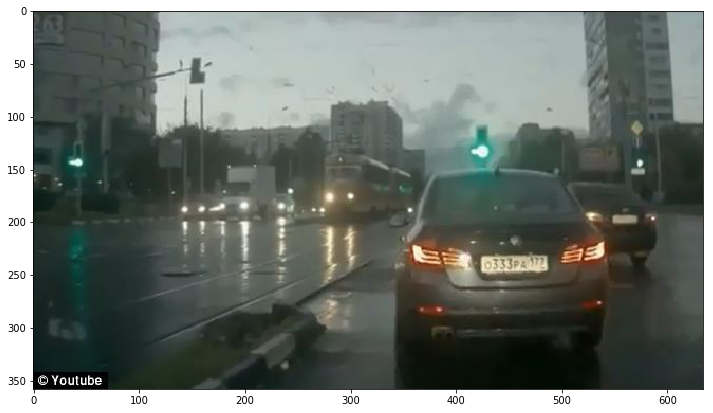

In [8]:
display(img)

**Load the haarcascade.**

In [9]:
plate_cascade = cv2.CascadeClassifier('../haarcascades/haarcascade_russian_plate_number.xml')

**Create a function that takes in an image and draws a rectangle around what it detects to be a license plate.**

In [29]:
def detect_plate(img):
        
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,
                                                scaleFactor = 1.2,
                                                minNeighbors = 5)
    
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,
                      (x,y),
                      (x+w,y+h),
                      (0,0,255), #BGR
                      4)
    return plate_img

In [30]:
result = detect_plate(img)

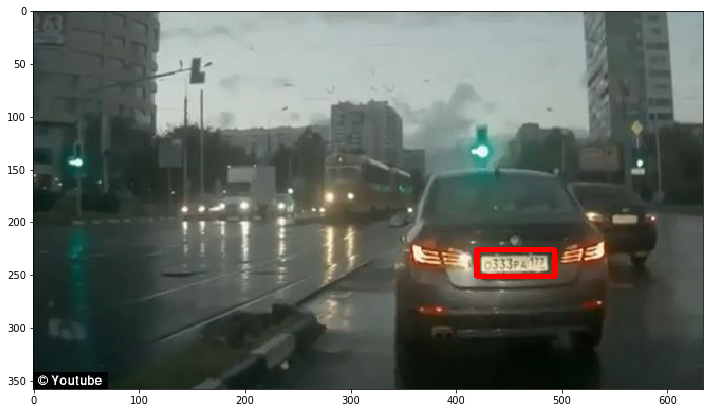

In [31]:
display(result)

**Edit the function so that is effectively blurs the detected plate.**

In [111]:
def detect_and_blur_plate(img):
        
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,
                                                scaleFactor = 1.2,
                                                minNeighbors = 5)
    
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,
                      (x,y),
                      (x+w,y+h),
                      (0,0,255), #BGR
                      4)
        
    # Get image of plate
    nimg = img.copy()
    plate = nimg[y:y+h,x:x+w]
    
    # Blur
    plate_blur = cv2.medianBlur(plate,7)
    
    # Numpy slicing
    complete = img.copy()
    complete[y:y+h,x:x+w] = plate_blur
    
    return complete

In [112]:
result = detect_and_blur_plate(img)

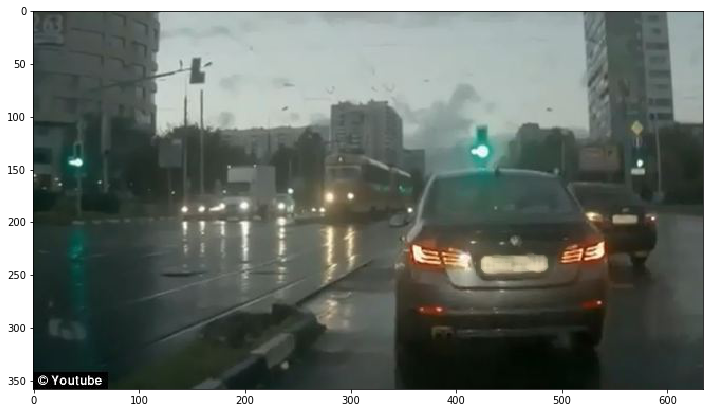

In [110]:
display(result)